# Collect Initial Data

In [1]:
import glob
import os
import numpy as np
import seaborn as sb
sb.set()
import matplotlib.pyplot as plt

In [2]:
#Eusebio
# data_directory = "C:/Users/joaquin/Desktop/mem_aitue/Datos/"
#Mini-Eusebio
data_directory = "C:/Users/jquin/Desktop/Memoria de Titulo/Aitue/Datos/"

In [3]:

file_names = [os.path.basename(x) for x in glob.glob(data_directory+"/[!~]*.xlsx")]
dir_files = glob.glob(data_directory+"/[!~]*.xlsx")

# del file_names[-1]
# del dir_files[-1]

print(file_names)
# print(dir_files)

['AltosDelValle_Cotizaciones.xlsx', 'AltosDelValle_Negocios.xlsx', 'cotizaciones_all.xlsx', 'Junge_Cotizaciones.xlsx', 'Junge_Negocios.xlsx', 'Mil610_Cotizaciones.xlsx', 'Mil610_Negocios.xlsx', 'negocios_all.xlsx', 'SanAndresDelValle_Cotizaciones.xlsx', 'SanAndresDelValle_Negocios.xlsx', 'Urban_Cotizaciones.xlsx', 'Urban_Negocios.xlsx']


In [4]:
project_names = [];project_types = [];project_file_types = []
for file in file_names:
    project_names.append(file.split('_')[0])
    project_types.append(file.split('_')[1].split('.')[0])
    project_file_types.append(file.split('.')[1])

In [5]:
import pandas as pd
dfs = []

for file_dir in dir_files:
    df = pd.read_excel(file_dir,header=0)
    dfs.append(df)


In [6]:
project_types

['Cotizaciones',
 'Negocios',
 'all',
 'Cotizaciones',
 'Negocios',
 'Cotizaciones',
 'Negocios',
 'all',
 'Cotizaciones',
 'Negocios',
 'Cotizaciones',
 'Negocios']

# Data Description

# Data Exploration Single File

In [7]:
def get_col_group_description(df,col):
    num_cot = []
    info = dict()
    for group, frame in df.groupby(col):
        num_cot.append(len(frame))
    #     print('There are ' + str(len(frame)) + ' records in group ' + str(group) + ' for processing.')

    cot_serie = pd.Series(num_cot)
    info['count'] = cot_serie.count()
    info['max'] = cot_serie.max()
    info['mean'] = cot_serie.mean()
    info['std'] = cot_serie.std()
    return info

get_col_group_description(dfs[0],'RUT')
#dfs[0].groupby('RUT')['RUT'].count()

{'count': 231,
 'max': 10,
 'mean': 1.9134199134199135,
 'std': 1.3517595590617344}

In [8]:
df_resume_cot = pd.DataFrame()
df_resume_neg = pd.DataFrame()


In [9]:
cot_index = [index for index in range(0,len(project_types)) if project_types[index] == 'Cotizaciones']
cot_names = [project_names[index] for index in range(0,len(project_names)) if index in cot_index]
cot_types = [project_types[index] for index in range(0,len(project_types)) if index in cot_index]
cot_ftypes = [project_file_types[index] for index in range(0,len(project_file_types)) if index in cot_index]
df_cot = [dfs[index] for index in range(0,len(dfs)) if index in cot_index]

In [10]:
neg_index = [index for index in range(0,len(project_types)) if project_types[index] == 'Negocios']
neg_names = [project_names[index] for index in range(0,len(project_names)) if index in neg_index]
neg_types = [project_types[index] for index in range(0,len(project_types)) if index in neg_index]
neg_ftypes = [project_file_types[index] for index in range(0,len(project_file_types)) if index in neg_index]
df_neg = [dfs[index] for index in range(0,len(dfs)) if index in neg_index]

In [11]:
#rows
df_resume_cot['filas'] = [x.shape[0] for x in df_cot]
df_resume_neg['filas'] = [x.shape[0] for x in df_neg]

In [12]:
#cols
df_resume_cot['cols'] = [x.shape[1] for x in df_cot]
df_resume_neg['cols'] = [x.shape[1] for x in df_neg]

In [13]:
#fechas min, max
df_resume_cot['fecha_min'] = [pd.to_datetime(df['Fecha Cotizacion'].tolist()).min() for x in df_cot]
df_resume_neg['fecha_min'] = [pd.to_datetime(df['Fecha Cotizacion'].tolist()).min() for x in df_neg]
df_resume_cot['fecha_max'] = [pd.to_datetime(df['Fecha Cotizacion'].tolist()).max() for x in df_neg]
df_resume_neg['fecha_max'] = [pd.to_datetime(df['Fecha Cotizacion'].tolist()).max() for x in df_neg]

In [14]:
#ruts
df_resume_cot['ruts_unicos'] = [len(x['RUT'].unique()) for x in df_cot]
df_resume_neg['ruts_unicos'] = [len(x['RUT'].unique()) for x in df_neg]

In [15]:
#ruts mean, std, max()
df_resume_cot['ruts_mean'] = [get_col_group_description(x,'RUT')['mean'] for x in df_cot]
df_resume_neg['ruts_mean'] = [get_col_group_description(x,'RUT')['mean'] for x in df_neg]

df_resume_cot['ruts_std'] = [get_col_group_description(x,'RUT')['std'] for x in df_cot]
df_resume_neg['ruts_std'] = [get_col_group_description(x,'RUT')['std'] for x in df_neg]

df_resume_cot['ruts_max'] = [get_col_group_description(x,'RUT')['max'] for x in df_cot]
df_resume_neg['ruts_max'] = [get_col_group_description(x,'RUT')['max'] for x in df_neg]

In [16]:
# otro datos negocios
#(len(x[x['Estado'] == 'Anulada'])/y['#filas'])
#('string' + str(len(x[x['Estado'] == 'Anulada'])) + " " +str(y))
df_resume_neg['%es_anulados']  = [(len(x[x['Estado'] == 'Anulada'])/y) for x,y in zip(df_neg,df_resume_neg['filas'])]
df_resume_neg['%es_promesas']  = [(len(x[x['Estado'] == 'Promesado'])/y) for x,y in zip(df_neg,df_resume_neg['filas'])]
df_resume_neg['%es_reserva']   = [len(x[x['Estado'] == 'Reservado'])/y for x,y in zip(df_neg,df_resume_neg['filas'])]
df_resume_neg['%esc_desistido'] = [len(x[x['Estado Comercial'] == 'Desistimiento'])/y for x,y in zip(df_neg,df_resume_neg['filas'])]
df_resume_neg['%esc_normal']    = [len(x[x['Estado Comercial'] == 'Normal'])/y for x,y in zip(df_neg,df_resume_neg['filas'])]

df_resume_neg

,filas,cols,fecha_min,fecha_max,ruts_unicos,ruts_mean,ruts_std,ruts_max,%es_anulados,%es_promesas,%es_reserva,%esc_desistido,%esc_normal
0,100,38,2017-03-27 17:03:29.563,2018-04-26 16:50:07.440,57,1.754386,1.366444,7,0.670000,0.220000,0.110000,0.040000,0.950000
1,101,38,2017-03-27 17:03:29.563,2018-04-26 16:50:07.440,52,1.942308,1.487378,7,0.504950,0.079208,0.188119,0.128713,0.811881
2,76,38,2017-03-27 17:03:29.563,2018-04-26 16:50:07.440,47,1.617021,0.898143,5,0.500000,0.065789,0.065789,0.065789,0.868421
3,1814,38,2017-03-27 17:03:29.563,2018-04-26 16:50:07.440,801,2.264669,1.822735,17,0.661521,0.085998,0.122933,0.127894,0.829658
4,196,38,2017-03-27 17:03:29.563,2018-04-26 16:50:07.440,120,1.633333,1.194760,8,0.500000,0.331633,0.168367,0.147959,0.841837


In [17]:
df_resume_neg.describe()

,filas,cols,ruts_unicos,ruts_mean,ruts_std,ruts_max,%es_anulados,%es_promesas,%es_reserva,%esc_desistido,%esc_normal
count,5.00000,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,457.40000,38.0,215.400000,1.842343,1.353892,8.800000,0.567294,0.156526,0.131042,0.102071,0.860359
std,759.75575,0.0,328.700928,0.269511,0.343082,4.711688,0.089960,0.116057,0.048522,0.046507,0.054167
min,76.00000,38.0,47.000000,1.617021,0.898143,5.000000,0.500000,0.065789,0.065789,0.040000,0.811881
25%,100.00000,38.0,52.000000,1.633333,1.194760,7.000000,0.500000,0.079208,0.110000,0.065789,0.829658
50%,101.00000,38.0,57.000000,1.754386,1.366444,7.000000,0.504950,0.085998,0.122933,0.127894,0.841837
75%,196.00000,38.0,120.000000,1.942308,1.487378,8.000000,0.661521,0.220000,0.168367,0.128713,0.868421
max,1814.00000,38.0,801.000000,2.264669,1.822735,17.000000,0.670000,0.331633,0.188119,0.147959,0.950000


# Data Exploration Combined Files: Cotizacion

In [18]:
# concat cotizaciones
cot_all = pd.concat(df_cot)
cot_all.to_excel(data_directory + 'cotizaciones_all.xlsx')
cot_all_resume = pd.DataFrame()

In [19]:
cot_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16238 entries, 0 to 2682
Data columns (total 31 columns):
ID                     16238 non-null int64
Fecha Cotizacion       16238 non-null object
Medio                  16238 non-null object
Tipo de Medio          15715 non-null object
Proyecto               16238 non-null object
Etapa                  16238 non-null object
Productos              15851 non-null object
Presencial             14203 non-null object
Remoto                 12667 non-null object
Jefe Comercial         16238 non-null object
Ejecutivo Comercial    16238 non-null object
Total Productos        16200 non-null float64
Descuentos             15951 non-null float64
Valor Final Venta      15951 non-null float64
RUT                    16238 non-null object
Nombre                 16238 non-null object
Apellido 1             16198 non-null object
Apellido 2             16190 non-null object
Nombre Completo        16238 non-null object
Telefono               1964 non-nul

In [21]:
df = cot_all
null_columns = df.columns[df.isnull().any()]
nulos = df[null_columns].isnull().sum()

nulos = pd.DataFrame({'Total':nulos,'Etiquetas':null_columns})

columnas = null_columns.copy()
filas = [df.shape[0]] * len(null_columns)

totales = pd.DataFrame({'Total':filas,'Etiquetas':columnas})

[Text(0,0.5,'Atributos'), Text(0.5,0,'Valores Nulo vs Total Filas')]

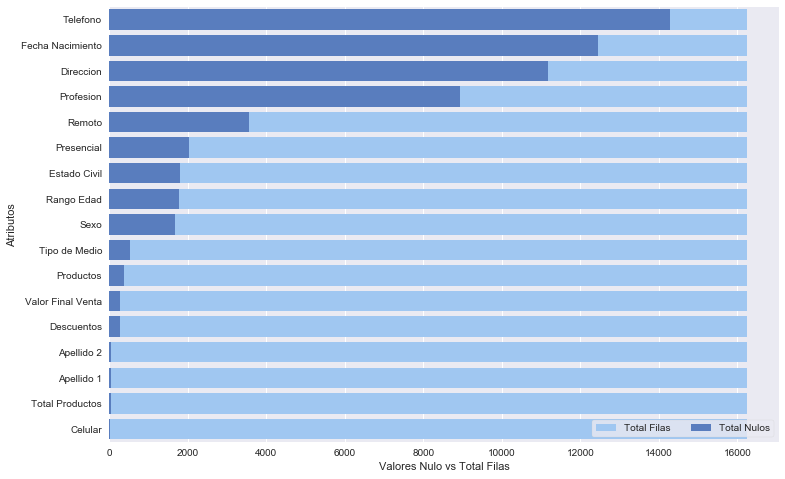

In [23]:
f, ax = plt.subplots(figsize=(12, 8))

sb.set_color_codes("pastel")
sb.barplot(data=totales.sort_values(by='Total',ascending=False), x='Total', y='Etiquetas',color="b",label="Total Filas")

sb.set_color_codes("muted")
sb.barplot(data=nulos.sort_values(by='Total',ascending=False), x='Total', y='Etiquetas',color="b",label="Total Nulos")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="Atributos", xlabel="Valores Nulo vs Total Filas")
# sb.despine(left=True, bottom=True)

In [87]:
#Variables categoricas
def ver_atributo_categorico(df,col,limit=False,lim=10,log=False,hue=None,palette=None):
    l = df[col].unique().tolist()
    l_len = len(l)
    
    if log:
        print(l_len,l)
    
    sb.set_color_codes("muted")
    if limit:
        return sb.countplot(y=col, data=df, color="r", order=df[col].value_counts().index[:lim],hue=hue,palette=palette);
    else:
        return sb.countplot(y=col, data=df, color="r", order=df[col].value_counts().index[:l_len],hue=hue,palette=palette);

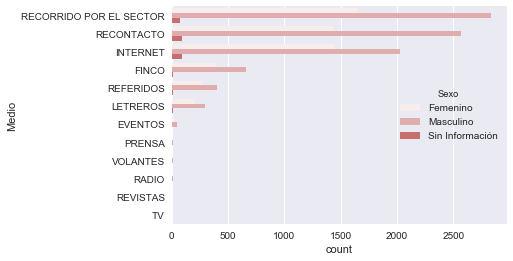

In [91]:
ver_atributo_categorico(cot_all,'Medio',hue='Sexo')

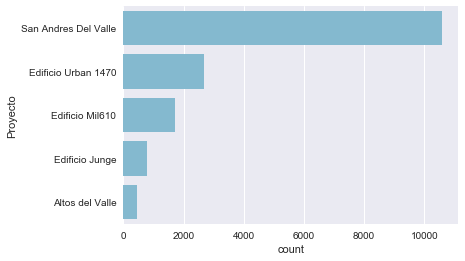

In [55]:
ver_atributo_categorico(cot_all,'Proyecto')

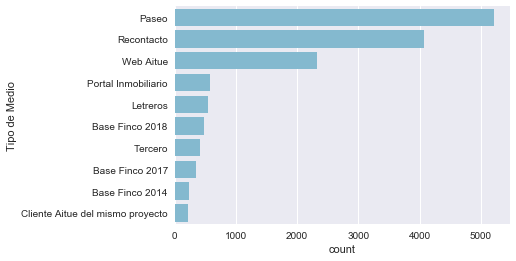

In [58]:
ver_atributo_categorico(cot_all,'Tipo de Medio',lim=10,limit=True)

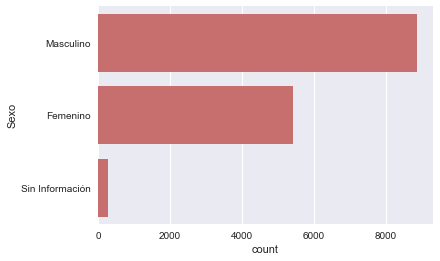

In [92]:
ver_atributo_categorico(cot_all,'Sexo')

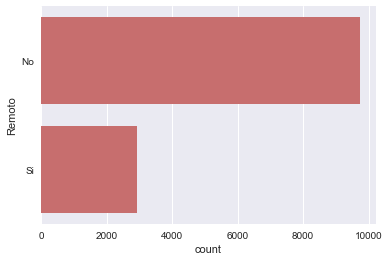

In [93]:
ver_atributo_categorico(cot_all,'Remoto')

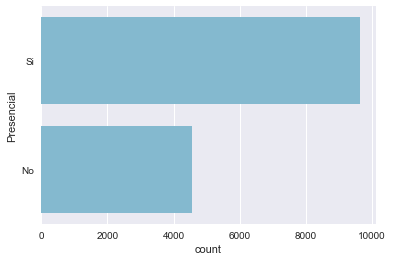

In [60]:
ver_atributo_categorico(cot_all,'Presencial')

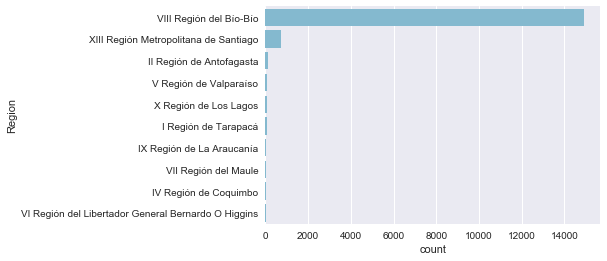

In [61]:
ver_atributo_categorico(cot_all,'Region',lim=10,limit=True)

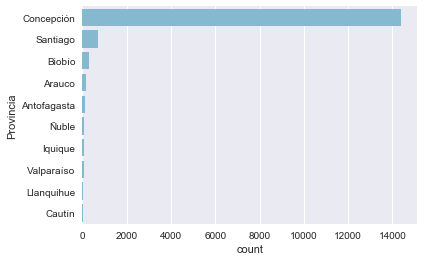

In [62]:
ver_atributo_categorico(cot_all,'Provincia',lim=10,limit=True)

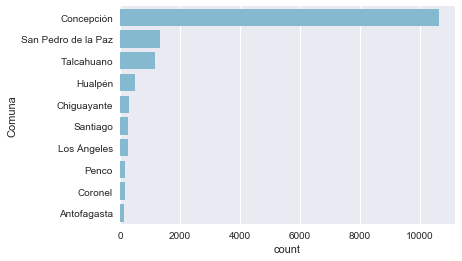

In [63]:
ver_atributo_categorico(cot_all,'Comuna',lim=10,limit=True)

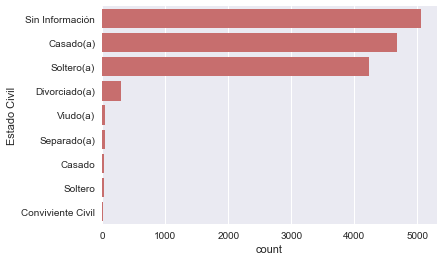

In [84]:
ver_atributo_categorico(cot_all,'Estado Civil')

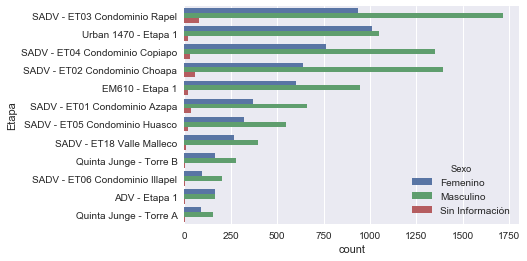

In [81]:
palette=["C0","C1","C2"]
ver_atributo_categorico(cot_all,'Etapa',hue='Sexo',palette=palette)

[Text(0.5,0,'total'), Text(0.5,0,'total')]

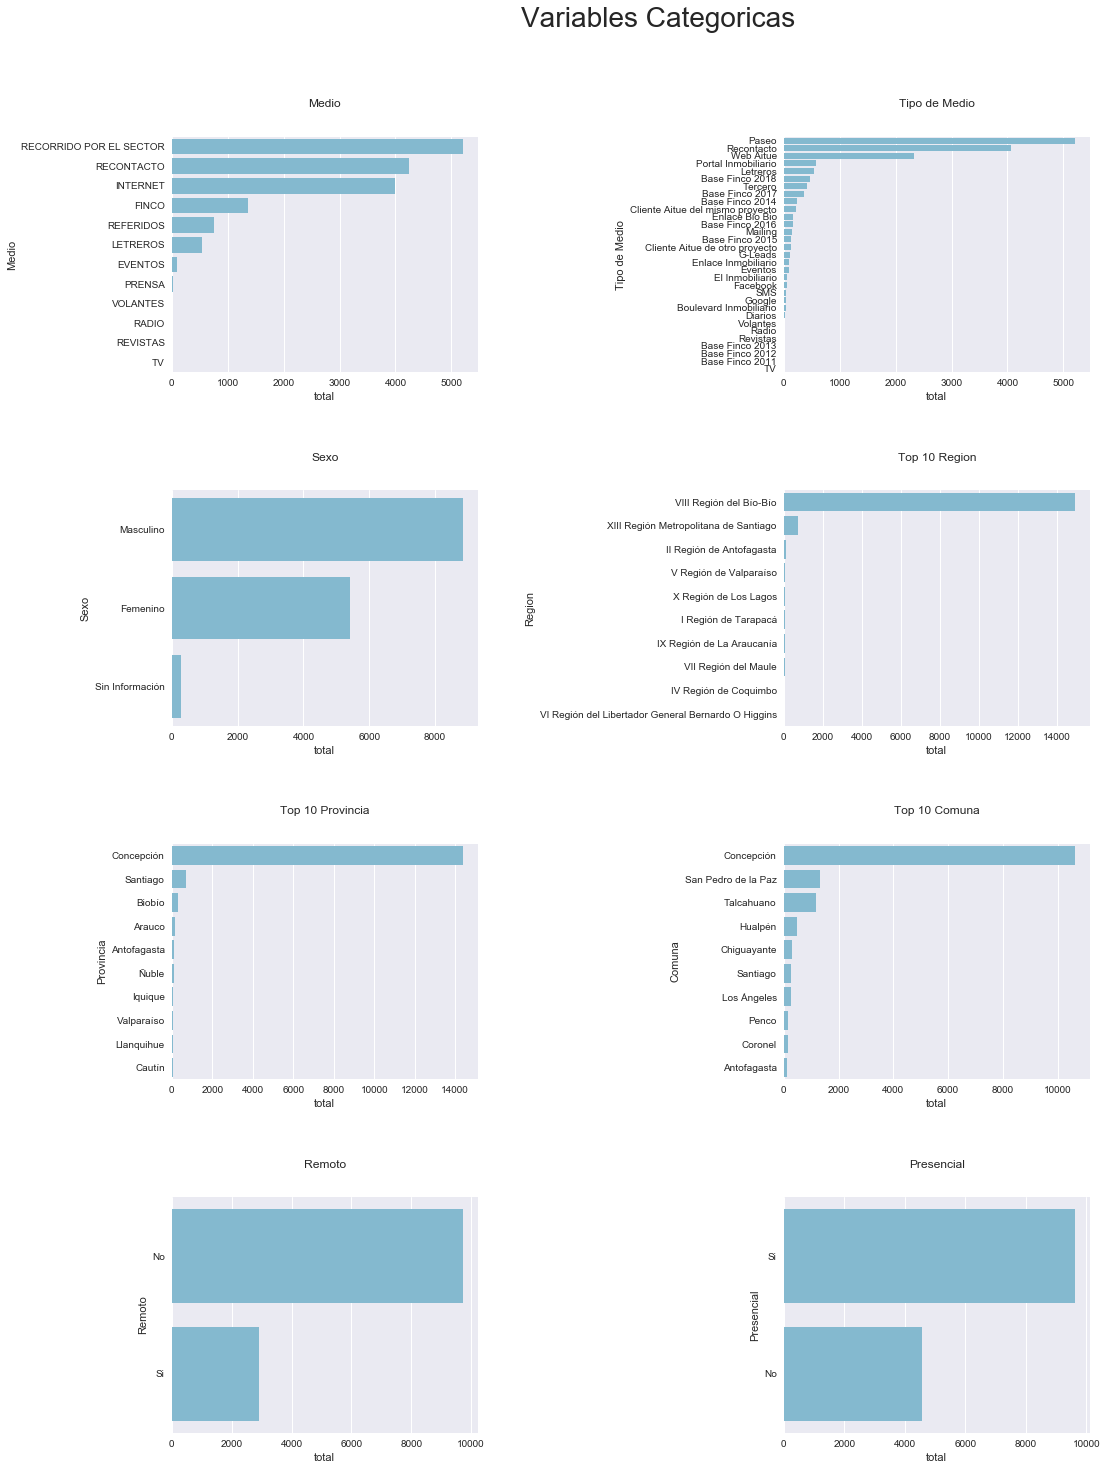

In [35]:
df = cot_all

fig, ax = plt.subplots(figsize=(15,20), ncols=2, nrows=4)

left   =  0.05  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  1    # the top of the subplots of the figure
wspace =  1.0     # the amount of width reserved for blank space between subplots
hspace =  0.5    # the amount of height reserved for white space between subplots

# This function actually adjusts the sub plots using the above paramters
plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)

# The amount of space above titles
y_title_margin = 1.1

plt.suptitle("Variables Categoricas", y = 1.09, fontsize=28)

###[0][:]

ax[0][0].set_title("Medio",y = y_title_margin)
ax[0][1].set_title("Tipo de Medio",y = y_title_margin)
# ax[0][2].set_title("Starndardized (StardardScaler)", y = y_title_margin)

sb.countplot(y='Medio', data=cot_all, color="c", order=cot_all['Medio'].value_counts().index,ax=ax[0][0]);
sb.countplot(y='Tipo de Medio', data=cot_all, color="c", order=cot_all['Tipo de Medio'].value_counts().index,ax=ax[0][1]);

# Set all labels on the row axis of subplots for bathroom data to "bathrooms"
[ax[0][i].set_xlabel("total") for i in range(0, 2)]

###[1][:]

ax[1][0].set_title("Sexo", y = y_title_margin)
ax[1][1].set_title("Top 10 Region", y = y_title_margin)

sb.countplot(y='Sexo', data=cot_all, color="c", order=cot_all['Sexo'].value_counts().index[:10],ax=ax[1][0]);
sb.countplot(y='Region', data=cot_all, color="c", order=cot_all['Region'].value_counts().index[:10],ax=ax[1][1]);
# Set all labels on the row axis of subplots for square_feet data to "square_feet"

[ax[1][i].set_xlabel("total") for i in range(0, 2)]

###[2][:]
ax[2][0].set_title("Top 10 Provincia",y = y_title_margin)
ax[2][1].set_title("Top 10 Comuna",y = y_title_margin)

sb.countplot(y='Provincia', data=cot_all, color="c", order=cot_all['Provincia'].value_counts().index[:10],ax=ax[2][0]);
sb.countplot(y='Comuna', data=cot_all, color="c", order=cot_all['Comuna'].value_counts().index[:10],ax=ax[2][1]);

# Set all labels on the row axis of subplots for square_feet data to "square_feet"
[ax[2][i].set_xlabel("total") for i in range(0, 2)]

###[2][:]
ax[3][0].set_title("Remoto",y = y_title_margin)
ax[3][1].set_title("Presencial",y = y_title_margin)

sb.countplot(y='Remoto', data=cot_all, color="c", order=cot_all['Remoto'].value_counts().index[:10],ax=ax[3][0]);
sb.countplot(y='Presencial', data=cot_all, color="c", order=cot_all['Presencial'].value_counts().index[:10],ax=ax[3][1]);

# Set all labels on the row axis of subplots for square_feet data to "square_feet"
[ax[3][i].set_xlabel("total") for i in range(0, 2)]

In [ ]:
#rows
df = cot_all
print("Filas: ",df.shape[0])
print("Columnas: ",df.shape[1])
print("Primer Registro: ",(pd.to_datetime(df['Fecha Cotizacion'].tolist()).min()))
print("Ultimo Registro: ",pd.to_datetime(df['Fecha Cotizacion'].tolist()).max())
print("Ruts Unicos: ",len(df['RUT'].unique()))
print("Cot rut promedio: ",get_col_group_description(df,'RUT')['mean'])
print("Cot rut desviacion: ",get_col_group_description(df,'RUT')['std'])
print("Cot por rut maximo: ",get_col_group_description(df,'RUT')['max'])


# Data Exploration Combined Files: Negociacion

In [85]:
neg_all = pd.concat(df_neg)
neg_all.to_excel(data_directory +'negocios_all.xlsx')
neg_all_resume = pd.DataFrame()

In [86]:
#rows
df = neg_all
print("Filas: ",df.shape[0])
print("Columnas: ",df.shape[1])
print("Primer Registro: ",(pd.to_datetime(df['Fecha Cotizacion'].tolist()).min()))
print("Ultimo Registro: ",pd.to_datetime(df['Fecha Cotizacion'].tolist()).max())
print("Ruts Unicos: ",len(df['RUT'].unique()))
print("Neg rut promedio: ",get_col_group_description(df,'RUT')['mean'])
print("Neg rut desviacion: ",get_col_group_description(df,'RUT')['std'])
print("Neg por rut maximo: ",get_col_group_description(df,'RUT')['max'])
print("Neg estado anulados: ",len(df[df['Estado'] == 'Anulada'])/neg_all.shape[0])
print("Neg estado promesa: ",len(df[df['Estado'] == 'Promesado'])/neg_all.shape[0])
print("Neg estado reservado: ",len(df[df['Estado'] == 'Reservado'])/neg_all.shape[0])
print("Neg estado comercial desistimiento: ",len(df[df['Estado Comercial'] == 'Desistimiento'])/neg_all.shape[0])
print("Neg estado comercial normal: ",len(df[df['Estado Comercial'] == 'Normal'])/neg_all.shape[0])

Filas:  2287
Columnas:  38
Primer Registro:  2013-08-19 18:35:56.620000
Ultimo Registro:  2018-04-26 16:50:07.440000
Ruts Unicos:  1068
Neg rut promedio:  2.141385767790262
Neg rut desviacion:  1.7300613369691278
Neg por rut maximo:  17
Neg estado anulados:  0.6357673808482729
Neg estado promesa:  0.11193703541757762
Neg estado reservado:  0.12724092697857456
Neg estado comercial desistimiento:  0.12374289462177525
Neg estado comercial normal:  0.8364669873196328


In [ ]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()